# Introduction

For our project we have decided to dive deep into the issue of climate change and the rise in pollution levels over the past decade. Our generation is already dealing with the negative effects of climate change and it is something that will be an issue that we must deal with for most likely the rest of our lives. While we are aware of how prevalent the climate change issue is in our world, we want to analyze how much climate change has actually become an issue, specifically in New York state where we are both currently students of Cornell University. These issues are ones that weigh heavily on many of our consciences and is something that affects our everyday decisions. In our analysis we want to see if over the years, as pollution levels rise and climate change becomes more rampant, are people making more sustainable choices to fight this reality. We will look at recycling rates and bike usage to quantify these sustainable efforts to help fight the climate change that is occuring. While we know these small individual actions will not completely save the planet, we want to see if there is positive change occuring in our society to fight against our current reality in whatever ways an individual can because small changes can lead to big movements.

For our data sources we use a dataset to examine the pollution levels in New York called, ghgp_data_by_year.csv which shows pollution levels across New  York organized by cities, industry sectors, and total emissions by year. The other dataset we have includes recycling rates in New York City where pollution is a major concern which is called recycling-diversion-and-capture-rates.csv which gives us the date, the borough, the recycling diversion rate, and the recycling capture rate for the years of 2010 and 2016. The other datasets we have include bike usage by Citi Bike in New York City. Here we have the date, the borough, and the bike’s usage information such as the birth year, gender, and type of user, and the time duration of the bike rental. For our overall research question, we are interested in how an increase in pollution levels over the last couple decades have affected public sentiment towards environmental activism and sustainable practices. We are interested in better understanding the relationship between climate change throughout the years and sentiment towards environmental activism and sustainable practices such as recycling and bike usage. 

# Data Description

### Pollution dataset
For the dataset on greenhouse gas emissions, each observation is of a facility that emits greenhouse gases. The majority of the facilities include power plants and chemical production centers. The attributes for each of these observations include FRS ID, facility name, city, state, zip code, address, county, latitude, longitude, NAICS code, industry subparts, industry sector, and emission for the years 2011 through 2018.  This dataset was created by the Environmental Protection Agency (EPA) in order to monitor greenhouse gas emissions for specific facilities across industries over time. Since the EPA sets environmental regulations, this data was likely collected in order to better understand how much pollution certain facilities contribute to the environment in order to determine a plan for regulating these industries. Given this, each facility likely provides the EPA with this data and is aware of the data collection that is occurring. The raw data can be found on our github page under the csv file that is named ghgp_data_by_year or our cleaned dataset version called ghg_data_ny.

### Recycling dataset
For the dataset on recycling rates in New York City, we have divided the data set into two dividing by the two years present in the dataset including 2010 and 2016. The attributes for this dataset include Zone, District, Fiscal Month Number, Fiscal Year, Month Name, Diversion Rate, and Capture Rate. This dataset was created by 
The raw data can be found on our github page under the csv file that is named recycling-diversion-and-capture-rates or our cleaned dataset versions called recycling_2010 and recycling_2016.

### Biking dataset
For the dataset on bike usage in New York City, we got our dataset from Citi Bike which has data on bike usage for every month and year since 2013. We have chosen to examine two datasets for the years of 2013 and 2016 to most closely resemble the years for the recycling datasets. The attributes for this dataset include Zone, Start Station Latitude, Start Station Longitude, tripduration, starttime, stoptime, start station id, end station id, end station name, end station latitude, end station longitude, bikeid, usertype, birthyear, and gender . The raw data can be found on our github page under the csv file that is named 201306-citibike-tripdata.csv and 201606-citibike-tripdata.csv or our cleaned samples of the dataset called biking_2013.csv and biking_2016.csv

# Pre-Registration Statement

For our two analyses we would like to understand how both individuals and local government have been able to carry out and influence sustainable human actions and behaviors over time as pollution levels change. Using our first two datasets, the goal of our first hypothesis test is to understand if a higher percentage of waste is being recycled in New York City over time across multiple districts. By comparing this against our dataset that maps pollution levels for NYC and another for the whole country, we are interested in whether the trends in recycling match that of pollution levels.  We will use a linear regression model with our x input being the pollution levels and seeing if there is a positive correlation with the y output of recycling. We would like to do a similar analysis with the biking and use a linear regression model with our x input in this case also being pollution levels, but this time comparing that with our y output of bike usage and see if there is a positive correlation. This is an appropriate method to address our research question because we want to see if people’s knowledge of a rise in pollution levels (the x variable) affect people’s participation in sustainable practices (recycling and bike usage as the y variables).

For our second hypothesis test, we plan on using Citi bike data from NYC since biking is more sustainable than other forms of transportation. We are interested in seeing how pollution levels might correlate with higher uses of the bikes, greater construction of bike routes on the part of the government, and if there are certain correlations between the location of where bike routes are established and the sustainable behaviors of the people. We plan on creating a multivariable Linear Regression model where we will group by the 5 boroughs of NYC and use measures of recycling such as the diversion rate (the percent of total waste that is recycled) and capture rate (the total recyclable waste that is sent to be recycled) as our X inputs to predict the number of bike routes in each area, the Y input. For this model, we’ll also have to create a new dataframe where we join the recycling data and the biking data. This model is appropriate because it will help us see if there is a correlation between how much people are biking and how much they are recycling to understand if people are engaging in environmentally sustainable behaviors. This will help us address our research question as it will help explain the sentiment towards environmental activism and how it varies between the NYC boroughs so that we can provide more context for our previous model which directly compares pollution levels to environmental activism. 

These two tests will hopefully help us understand if government actions like constructing bike routes might be driving responses (which might lead to higher Citi bike use) to rising pollution levels or if individuals are taking action of their own and are becoming more environmentally conscious (this can be inferred from the recycling data analysis) as they become aware of increasing pollution levels. 

# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import poisson, ttest_ind

### Understanding Pollution Levels in NY
Before analyzing how attitudes towards sustainable practices have changed from 2010 to 2016 in New York, we wanted to understand how pollution levels have changed over time and who were the largest contributors to pollution both from the persepctive of which cities were contributing the most to pollution and which industries. 

In [5]:
ghg_ny = pd.read_csv('ghg_ny.csv')
ghg_ny.head()

,Unnamed: 0,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,...,industy_subparts,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
0,0,1000077,110000774797,REPUBLIC STEEL LACKAWANNA,BLASDELL,NY,14219,S3049 LAKESHORE RD.,ERIE COUNTY,42.80,...,C,Metals,78801.40,76235.01,61447.47,73193.02,77355.81,71702.38,80619.20,72355.73
1,1,1000093,110000324435,Momentive Performance Materials,WATERFORD,NY,12188,260 HUDSON RIVER ROAD,Saratoga,42.82,...,CTT,OtherWaste,134663.45,131363.56,125491.33,126818.78,127808.87,132095.46,120944.74,142529.89
2,2,1000101,110019468057,Athens Generating Company,ATHENS,NY,12015,9300 U S HIGHWAY 9W,Greene,42.27,...,D,Power Plants,1381328.03,1487213.14,1514867.54,1285191.24,1026373.20,1376177.50,2133936.99,1566947.61
3,3,1000108,110012158707,North 1st,BROOKLYN,NY,11211,NORTH 1ST & 47-79 RIVER ST,Kings,40.72,...,CD,Power Plants,31069.94,22460.32,26369.45,18559.93,20816.32,26629.45,26775.50,45473.83
4,4,1000111,110012158734,Vernon Boulevard,LONG ISLAND CITY,NY,11427,42 30 VERNON BLVD,Queens,40.75,...,CD,Power Plants,35221.82,28073.30,28262.00,27000.90,26232.55,43133.84,38257.51,44820.68


#### Changes in Pollution from 2010 to 2016
For our first visuallization, we wanted to see if there is any relationship between the pollution levels in 2010 and 2016. We chose these two years because all of our 5 datasets have a large data sample for 2016 and and we chose 2010 so that there was a large enough time difference between the two years to see noticeable trends.

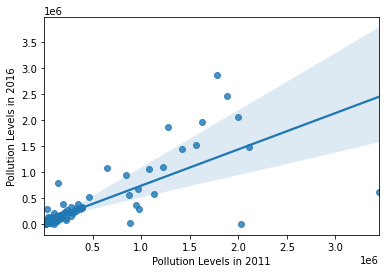

In [6]:
sns.regplot(x="2011", y="2016", data=ghg_ny)
plt.xlabel("Pollution Levels in 2011")
plt.ylabel("Pollution Levels in 2016")
plt.show()

In this graph, we notice two key ideas. The first is that the axis scales for 2016 have pollution rates that are higher than the highest ones in 2011 by 500,000. This shows that there has been a large increase in pollution levels from 2011 to 2016. This graph also shows a proportional relationship where as pollution levels increase in 2011, pollution levels increase proportionately in 2016. This relationship reveals that the highest polluters in 2011 continue to be the highest polluters in 2016 despite new regulations from the Environmental Protection Agency (EPA) on power and chemical plants such as the Mercury and Air Toxics Standards of 2014. We test the signifiance of these findings later in the report.

#### Pollution Level by Industry
In the previous graph, we noticed that the points seem to be grouped in two clusters - one seems to occur below 0.5e6 levels on pollution in both 2011 and 2016 and the other cluster seems to start at 0.6e6 pollution level in 2011 and 2016 and increases more rapidly in 2016 than the first cluster. The dataset contains several different variables that could correlate with these two clusters such as industry sector or zip code. We graphed these variables and industry sector seems to follow the trends most closely of the clusters we noticed initiatilly. On the next graph, you can see the graph we created where we color coded the clusters. The first cluster refers to the green and red points while the second cluster refers to the brown points. 

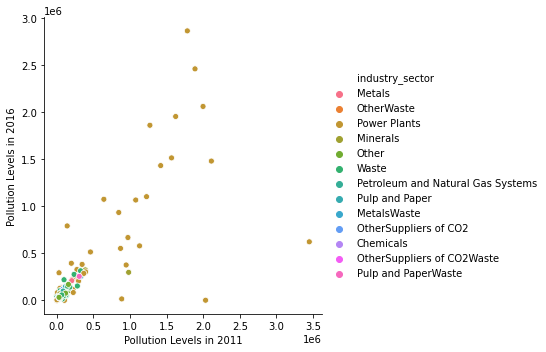

In [7]:
sns.relplot(x="2011", y="2016", hue="industry_sector", data=ghg_ny)
plt.xlabel("Pollution Levels in 2011")
plt.ylabel("Pollution Levels in 2016")
plt.show()

After color coding the points in the graph based on industry sector, there were a few key ideas that we came across that influenced the next steps of our analysis. At first, based on our initial plots, thought there were two industries based on the cluster patterns we saw. However, this graph showed us that there were 13 different industry sectors within dataset, but only a few were prevalent such as power plants (the brown colored points). To limit the number of industries so that it fit the cluster pattern, we wanted to calculate which industries had the highest counts in the dataset and focus on those. 

In [8]:
ghg_ny["industry_sector"].value_counts()

Power Plants                         76
Waste                                36
Other                                32
Minerals                              9
Petroleum and Natural Gas Systems     7
Metals                                6
Pulp and Paper                        5
OtherSuppliers of CO2                 2
Chemicals                             2
MetalsWaste                           1
Pulp and PaperWaste                   1
OtherSuppliers of CO2Waste            1
OtherWaste                            1
Name: industry_sector, dtype: int64

After using the value counts function, we found that the most prevalent industries in this dataset were power plants, waste, and other. Since waste and other have a very small difference in the number of counts, we decided to cluster our dataset by 3 groups. We chose not to include the other industry sectors in our analysis since their counts were too low and too mixed in with our top three groups to be able to identify clear trends and patterns. We used KMeans clustering in order to do this analysis.

In [213]:
## initialize a KMeans object
clustering = KMeans(n_clusters = 3, random_state = 15)

## perform the KMeans algorithm on the pollution for 2011 and 2016
clustering.fit(ghg_ny[["2011", "2016"]])

##finding the cluster centers
clustering.cluster_centers_

array([[  87235.63477987,   88936.0527044 ],
       [1901039.43888889, 1806430.52      ],
       [1055539.39181818,  606134.08272727]])

In [214]:
## Create cluster labels
cluster_labels = clustering.labels_
cluster_labels[0:5]
ghg_ny['cluster_label'] = cluster_labels
ghg_ny.head()

,Unnamed: 0,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,...,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011,cluster_label
0,0,1000077,110000774797,REPUBLIC STEEL LACKAWANNA,BLASDELL,NY,14219,S3049 LAKESHORE RD.,ERIE COUNTY,42.80,...,Metals,78801.40,76235.01,61447.47,73193.02,77355.81,71702.38,80619.20,72355.73,0
1,1,1000093,110000324435,Momentive Performance Materials,WATERFORD,NY,12188,260 HUDSON RIVER ROAD,Saratoga,42.82,...,OtherWaste,134663.45,131363.56,125491.33,126818.78,127808.87,132095.46,120944.74,142529.89,0
2,2,1000101,110019468057,Athens Generating Company,ATHENS,NY,12015,9300 U S HIGHWAY 9W,Greene,42.27,...,Power Plants,1381328.03,1487213.14,1514867.54,1285191.24,1026373.20,1376177.50,2133936.99,1566947.61,1
3,3,1000108,110012158707,North 1st,BROOKLYN,NY,11211,NORTH 1ST & 47-79 RIVER ST,Kings,40.72,...,Power Plants,31069.94,22460.32,26369.45,18559.93,20816.32,26629.45,26775.50,45473.83,0
4,4,1000111,110012158734,Vernon Boulevard,LONG ISLAND CITY,NY,11427,42 30 VERNON BLVD,Queens,40.75,...,Power Plants,35221.82,28073.30,28262.00,27000.90,26232.55,43133.84,38257.51,44820.68,0


After initializing a KMeans object, we performed the KMeans algorithm on the pollution levels for 2010 and for 2016 in order to create cluster labels that had the predicted industry. We added these cluster labels to the ghg_ny dataframe and then, tested the accuracy of the algorithm visually using the plot below. The colors of the points indicate the actual industry that produced pollution and the styles of the points indicate the industry predicted by the algorithm. In the legend of the graph, 0 represents Power Plants, 1 represents Waste, and 2 representes Other. 

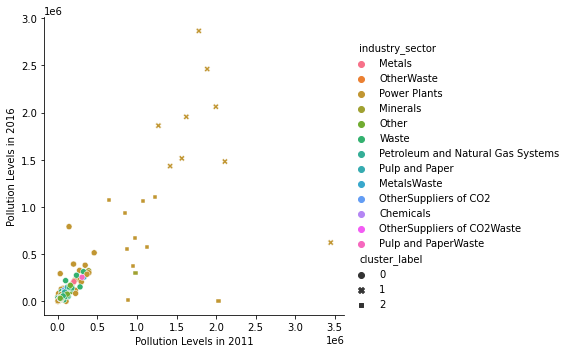

In [215]:
sns.relplot(x="2011", y="2016", hue="industry_sector", style="cluster_label", data=ghg_ny)
plt.xlabel("Pollution Levels in 2011")
plt.ylabel("Pollution Levels in 2016")
plt.show()

After creating the plot, it seems that the clustering algorithm was not that accurate as several of the Power Plant points were identified to be a mix of all three of the industries (We complete a more thorough analysis of the statistical significance of these findings later in the report). This reveals that the clusters are likely not correlated with industry sector and that pollution levels contributed varies a lot within an industry. Some likely causes for this variation could be variables that were not measured by the dataset such as size of the factory or differing environmental regulations across cities. 

#### Top Contributors to Pollution by City
After looking at industry, we were able to understand how pollution varies within and across industries, but we were still unable to fully explain what was causing some of the higher values of pollution in some of the power plants. To further explore this question, we decided to look at what the highest pollution levels were, which cities were overall producting the most pollution, and which cities were consisently polluting the most from 2010-2018. The graph compares pollution levels in 2010 and 2016, but is color coded by city this time instead of industry.

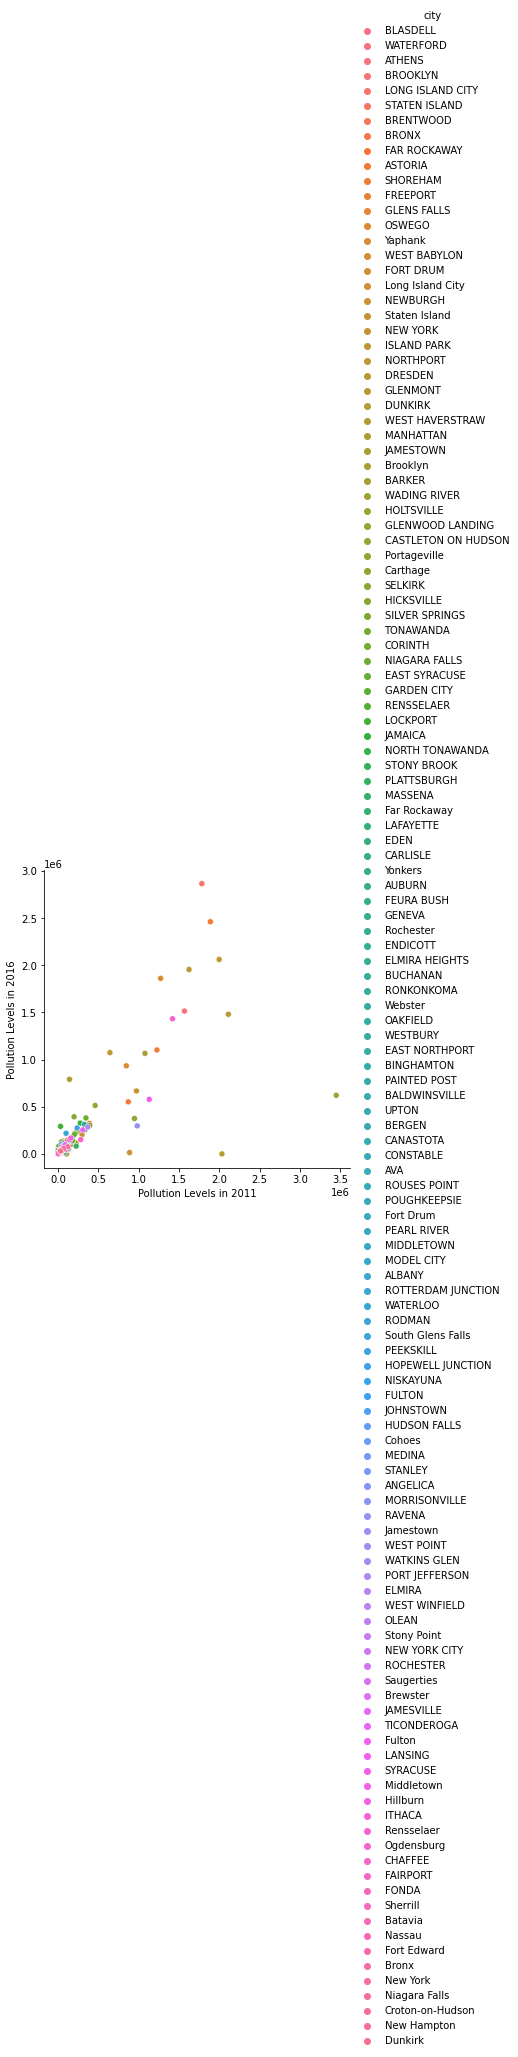

In [225]:
sns.relplot(x="2011", y="2016", hue="city", data=ghg_ny)
plt.xlabel("Pollution Levels in 2011")
plt.ylabel("Pollution Levels in 2016")
plt.show()

Based on the graph, it seems that some of the top polluters are in Astoria and New York as indicated by the orange and brown colored points. To get a more comprehensive understanding of which factories and cities are the top polluters, we decided to see how pollution levels in these cities across the entire timespan of the dataset (2011-2018). In the next few steps, we use the function, nlargest, to calculate the largest polluters and track their greenhouse gas emissions over time in a new dataframe titled top_polluters.

In [13]:
top_pollutors = pd.DataFrame()
top_pollutors["counts_2012"] = ghg_ny.groupby("city")["2012"].sum().nlargest(3)
top_pollutors["counts_2011"] = ghg_ny.groupby("city")["2011"].sum()
top_pollutors["counts_2013"] = ghg_ny.groupby("city")["2013"].sum()
top_pollutors["counts_2014"] = ghg_ny.groupby("city")["2014"].sum()
top_pollutors["counts_2015"] = ghg_ny.groupby("city")["2015"].sum()
top_pollutors["counts_2016"] = ghg_ny.groupby("city")["2016"].sum()
top_pollutors["counts_2017"] = ghg_ny.groupby("city")["2017"].sum()
top_pollutors["counts_2018"] = ghg_ny.groupby("city")["2018"].sum()
top_pollutors.head()

,counts_2012,counts_2011,counts_2013,counts_2014,counts_2015,counts_2016,counts_2017,counts_2018
city,,,,,,,,
ASTORIA,4764387.02,4042716.00,4380823.02,4675385.27,4466886.67,4155855.99,3778604.39,4217072.28
NEW YORK,2622599.36,2735569.11,2803733.68,2662647.29,2675021.50,2643367.57,2610288.32,2682403.80
OSWEGO,2422483.93,1500633.06,2346473.42,2683641.65,2847435.29,2086964.18,1941340.78,2319907.68


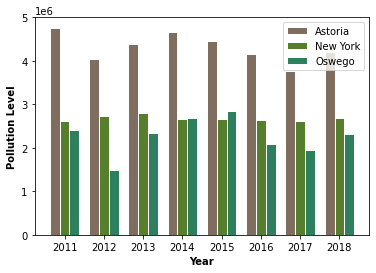

In [43]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = top_pollutors.iloc[0]
bars2 = top_pollutors.iloc[1]
bars3 = top_pollutors.iloc[2]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Astoria')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='New York')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Oswego')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Pollution Level', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

After creating this graph, we found out that the top three polluters in New York state have consistently been Astoria, New York, and Oswego. Although Astoria surpasses New York and Oswego levels all eight years, we decided to focus the rest of our analysis on New York (NYC) since there was more data available on environmental activism and sustainability initiatives.

### Recycling in 2010 vs. 2016
There are two csv files for recycling data. One file is for 2010 and the other file is for 2016.

In [14]:
recycling_2010 = pd.read_csv('recycling_2010.csv')
recycling_2010.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
0,0,Manhattan,MN01,11,2010,May,29.3,54.4,70.2,58.2
1,1,Manhattan,MN02,11,2010,May,26.5,44.3,79.0,52.7
2,2,Manhattan,MN03,11,2010,May,13.1,47.5,39.5,44.0
3,3,Manhattan,MN04,11,2010,May,23.1,37.4,73.0,45.9
4,4,Manhattan,MN05,11,2010,May,23.8,41.1,66.6,47.3


In [15]:
recycling_2016 = pd.read_csv('recycling_2016.csv')
recycling_2016.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
0,59,Brooklyn,BKN01,1,2016,July,14.7,44.0,43.2,43.6
1,60,Brooklyn,BKN02,1,2016,July,16.5,30.2,49.8,36.0
2,61,Brooklyn,BKN03,1,2016,July,10.1,29.0,32.8,30.8
3,62,Brooklyn,BKN04,1,2016,July,12.4,30.6,46.4,37.8
4,63,Brooklyn,BKN05,1,2016,July,9.1,23.5,33.0,27.9


There are two files for Citibike data. One is for 2013 (the earliest year recorded) and the other is for 2016.

In [18]:
biking_2013 = pd.read_csv('biking_2013.csv')
biking_2013.head()

,Unnamed: 0,Zone,start station latitude,start station longitude,index,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,8,1.0,40.72,-73.98,416821,663,2013-06-25 08:23:45,2013-06-25 08:34:48,393,E 5 St & Avenue C,293.0,Lafayette St & E 8 St,40.730207,-73.991026,16733,Subscriber,1957.0,2
1,16,1.0,40.72,-73.98,305402,1452,2013-06-21 07:00:30,2013-06-21 07:24:42,349,Rivington St & Ridge St,522.0,E 51 St & Lexington Ave,40.757148,-73.972078,19616,Subscriber,1987.0,2
2,24,1.0,40.72,-73.98,525696,719,2013-06-29 09:27:43,2013-06-29 09:39:42,349,Rivington St & Ridge St,369.0,Washington Pl & 6 Ave,40.732241,-74.000264,17302,Subscriber,1982.0,1
3,32,1.0,40.72,-73.98,290404,561,2013-06-20 16:08:52,2013-06-20 16:18:13,411,E 6 St & Avenue D,502.0,Henry St & Grand St,40.714215,-73.981346,17235,Subscriber,1964.0,2
4,40,1.0,40.72,-73.98,473951,943,2013-06-27 08:18:32,2013-06-27 08:34:15,317,E 6 St & Avenue B,442.0,W 27 St & 7 Ave,40.746647,-73.993915,17940,Subscriber,1984.0,1


In [19]:
biking_2016 = pd.read_csv('biking_2016.csv')
biking_2016.head()

,Unnamed: 0,Zone,start station latitude,start station longitude,index,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,0,3.0,40.71,-73.94,900435,160,6/20/2016 06:22:53,6/20/2016 06:25:33,3070,McKibbin St & Manhattan Ave,3071,Boerum St & Broadway,40.705381,-73.949765,17226,Subscriber,1952.0,1
1,2,3.0,40.71,-73.94,750686,1474,6/17/2016 00:03:24,6/17/2016 00:27:59,3074,Montrose Ave & Bushwick Ave,3129,Queens Plaza North & Crescent St,40.751102,-73.940737,25447,Subscriber,1991.0,1
2,4,3.0,40.71,-73.94,747914,634,6/16/2016 21:44:55,6/16/2016 21:55:30,3081,Graham Ave & Grand St,3068,Humboldt St & Varet St,40.703172,-73.940636,19282,Subscriber,1981.0,1
3,6,1.0,40.72,-73.98,895781,1249,6/19/2016 21:02:22,6/19/2016 21:23:11,411,E 6 St & Avenue D,446,W 24 St & 7 Ave,40.744876,-73.995299,20052,Subscriber,1980.0,1
4,14,1.0,40.72,-73.98,1022077,443,6/22/2016 11:02:31,6/22/2016 11:09:55,150,E 2 St & Avenue C,293,Lafayette St & E 8 St,40.730287,-73.990765,18622,Subscriber,1991.0,1


#### Capture Rate 2010
In this dataset, the capture rate represents the percent of the total waste that is sent to the plant that actually ends up being recycled. The closer the capture rate is to 100, the more efficient the recycling plant is. Ideally, a plant should have a capture rate of 70%, but a more realistic capture rate of 50% is also considered to be very efficient. In the following analyses, we analyze the probability of reaching a capture rate of 50% and 70% in NYC.

The following histogram shows the distribution of capture rates for each of the districts of NYC.

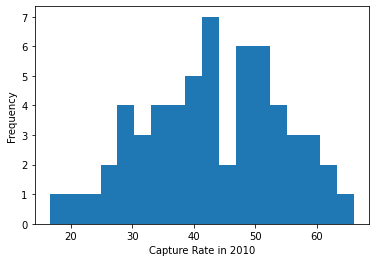

In [20]:
##Histogram for 2010
plt.hist(recycling_2010["Capture Rate"], bins=18)
plt.xlabel("Capture Rate in 2010")
plt.ylabel("Frequency")
plt.show()

In order to predict the probabilities of reaching a capture rate of 50% and 70%, we calculated the overall mean capture rate in 2010 and used it to approximate a poisson distribution of 1000 samples. We chose to model this scenario using a poisson distribution because there more than two outcomes and each outcome does not have an equal chance of occurring.

In [21]:
## Average Capture Rate for 2010
mean_2010 = round(recycling_2010[["Capture Rate"]].mean(),2)
draws_2010 = np.random.poisson(mean_2010, 1000)

In [226]:
print("Mean Capture Rate for 2010: ", mean_2010[0])

Mean Capture Rate for 2010:  43.22


This graph below shows the poisson distribution that is an approximation of the previous histogram. The graph also has two lines - the red line marks which values fall after a 50% capture rate and the green line marks which values fall after a 70% capture rate.

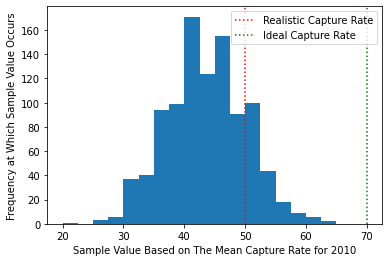

In [23]:
## Histogram for draws_2010
plt.hist(draws_2010, bins=18)
plt.xlabel("Sample Value Based on The Mean Capture Rate for 2010")
plt.ylabel("Frequency at Which Sample Value Occurs")
plt.axvline(color='r', linestyle="dotted", x=50, label="Realistic Capture Rate")
plt.axvline(color='g', linestyle="dotted", x=70, label="Ideal Capture Rate")
plt.legend(loc="upper right")
plt.show()

In [228]:
## Probability of Capturing 50% in 2010
rate50_2010 = round(float(poisson.sf(50, mean_2010)*100),4)
print("The probability of capturing more than 50% of recycled waste is: "+ str(rate50_2010)+"%")

The probability of capturing more than 50% of recycled waste is: 13.501%


In [227]:
## Probability of Capturing 70% in 2010
rate70_2010 = round(float(poisson.sf(70, mean_2010)*100),4)
print("The probability of capturing more than 70% of recycled waste is: "+ str(rate70_2010)+"%")

The probability of capturing more than 70% of recycled waste is: 0.0066%


Based on the histogram and the probabilities, in 2010 the probability of a district having a capture rate over 50 was 13.5% and having one over 70 was 0.0066%. These probabilities are extremely low and could be attributed to a variety of reasons such as not having enough facilitites to recycle all waste, individuals recycling waste that cannot actually be recycled at the plant, or not having specialized recycling facilities that handle wastes like CD's that cannot be recycled in a typical recycling plant.

#### Capture Rate 2016
The following histogram shows the distribution of capture rates for each of the districts of NYC in 2016. The analyses follows the same steps that we did for the analysis of the capture rate in 2010.

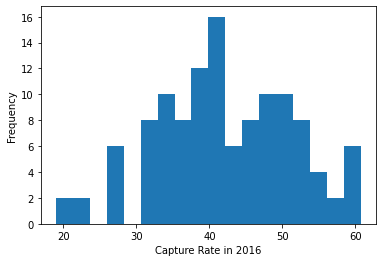

In [26]:
##Histogram for 2016
plt.hist(recycling_2016["Capture Rate"], bins=18)
plt.xlabel("Capture Rate in 2016")
plt.ylabel("Frequency")
plt.show()

Creating the poisson distribution:

In [27]:
## Average Capture Rate for 2016
mean_2016 = round(recycling_2016[["Capture Rate"]].mean(),2)
draws_2016 = np.random.poisson(mean_2016, 1000)

In [229]:
print("Mean Capture Rate for 2016: ", mean_2016[0])

Mean Capture Rate for 2016:  42.02


Graphing the poisson approximation and the realistic (50) vs. ideal (70) capture rates:

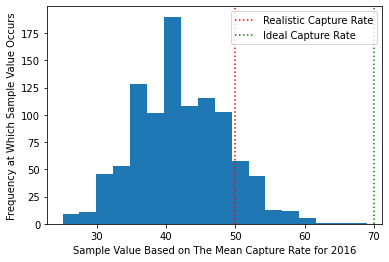

In [29]:
## Histogram for draws_2016
plt.hist(draws_2016, bins=18)
plt.xlabel("Sample Value Based on The Mean Capture Rate for 2016")
plt.ylabel("Frequency at Which Sample Value Occurs")
plt.axvline(color='r', linestyle="dotted", x=50, label="Realistic Capture Rate")
plt.axvline(color='g', linestyle="dotted", x=70, label="Ideal Capture Rate")
plt.legend(loc="upper right")
plt.show()

In [230]:
## Probability of Capturing 50% in 2016
rate50_2016 = round(float(poisson.sf(50, mean_2016)*100),4)
print("The probability of capturing more than 50% of recycled waste is: "+ str(rate50_2016)+"%")

The probability of capturing more than 50% of recycled waste is: 9.8094%


In [231]:
## Probability of Capturing 70% in 2016
rate70_2016 = round(float(poisson.sf(70, mean_2016)*100),4)
print("The probability of capturing more than 70% of recycled waste is: "+ str(rate70_2016)+"%")

The probability of capturing more than 70% of recycled waste is: 0.0029%


The probabilities for reaching a realistic or ideal capture rate in 2016 were even lower than the ones for 2010, which shows that NYC's capture rate has decreased over time. This decrease in the capture rate could suggest that a decrease in environmental activism or it could be due to other factors that were listed before such as individuals recycling items that cannot be recycled. In the next steps of our analyses, we explore what might have contributed to a decrease in the capture rate by grouping the data by borough instead of looking at the overall values.

#### Capture Rate by Borough in 2010 and 2016
This bar graph shows the capture rate by borough in NYC in 2010.

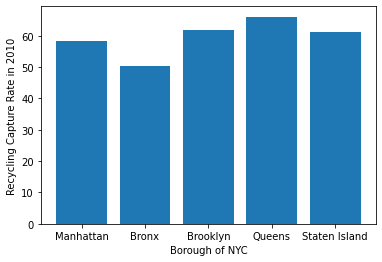

In [32]:
plt.bar(recycling_2010["Zone"], recycling_2010["Capture Rate"])
plt.xlabel('Borough of NYC')
plt.ylabel('Recycling Capture Rate in 2010')
plt.show()

This bar graph shows the capture rate by borough in NYC in 2016.

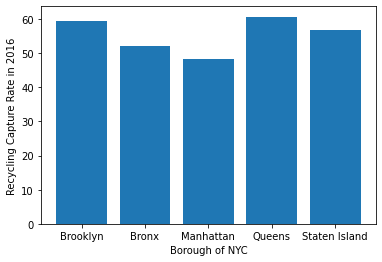

In [33]:
plt.bar(recycling_2016["Zone"], recycling_2016["Capture Rate"])
plt.xlabel('Borough of NYC')
plt.ylabel('Recycling Capture Rate in 2016')
plt.show()

From 2010 to 2016 the capture rates for Brooklyn, Queens, and Staten Island stay the same. The capture rate for the Bronx increases, but the capture rate for Manhattan decreases. Baesd on these charts, it becomes more clear that the state of recycling did not change across all of New York City, but instead depended on the borough. The Bronx was able to increase efficiency which could have been through more efficient recycling plants or even through more awareness among individuals who have improved their recycling practices. The overall decrease in the capture rate from 2010 and 2016 as we saw from the previous analyses can be attributed to the decrease in the capture rate in Manhattan. Since Manhattan is the second largest borough in NYC (after Brooklyn) with a population of 1.62 million, a change in the capture rate in Manhattan affected the overall rate more than an increase in the capture rate in the Bronx since it is a smaller area with a smaller population, and therefore, a smaller impact. In this section, we used recycling capture rates as a measure of sustainable behaviors. In the next sections, we explore biking as a sustainable behavior by trying to find if the decrease in recycling in Manhattan correlates with a decrease in other sustainable behaviors including biking.

### Comparing Sustainable Behaviors (Biking vs. Recycling)
In this section we compare the number of Citibike trips in 2013 and 2016 by borough to see if they follow the same trends as what we found in the previous analysis with recycling capture rates. If we see the same trends, we can use the data to further understand how sustainable behavior in NYC has changed over time.

In the next two cells, we count the number of bike trips per borough. The first dataframe is for 2013 and the second dataframe is for 2016.

In [34]:
boro_counts_2013 = pd.DataFrame(biking_2013["Zone"].value_counts())
boro_counts_2013 = boro_counts_2013.rename(columns={"Zone":"boro_counts"})
boro_counts_2013["Zone"] = ["Manhattan", "Brooklyn"]
boro_counts_2013.head()

,boro_counts,Zone
1.0,706,Manhattan
3.0,91,Brooklyn


In [35]:
boro_counts_2016 = pd.DataFrame(biking_2016["Zone"].value_counts())
boro_counts_2016 = boro_counts_2016.rename(columns={"Zone":"boro_counts"})
boro_counts_2016["Zone"] = ["Manhattan", "Brooklyn","Queens"]
boro_counts_2016.head()

,boro_counts,Zone
1.0,740,Manhattan
3.0,73,Brooklyn
4.0,16,Queens


The two bar graphs below are a graphical representation of the dataframes from above.

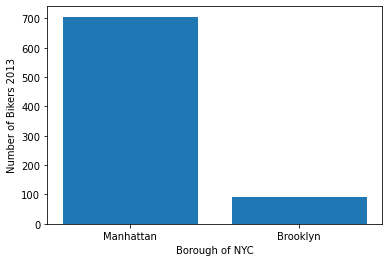

In [36]:
plt.bar(boro_counts_2013["Zone"], boro_counts_2013["boro_counts"])
plt.xlabel('Borough of NYC')
plt.ylabel('Number of Bikers 2013')
plt.show()

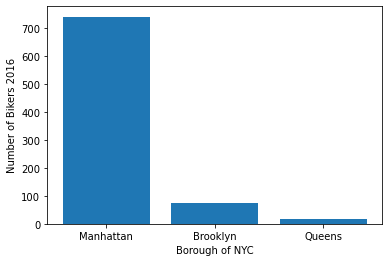

In [37]:
plt.bar(boro_counts_2016["Zone"], boro_counts_2016["boro_counts"])
plt.xlabel('Borough of NYC')
plt.ylabel('Number of Bikers 2016')
plt.show()

From these graphs, we are able to see that the number of bike trips in Manhattan and Brooklyn remained almost the same in 2013 and 2016. However, there was an increase in the number of bike trips in Queens. There are a few reasons that this could have happened. Since there are no trips in Queens in 2013, it is likely that there were no bike stations contructed in Queens since that is the first year the Citibike was implemented. Customers might have used the bike in Queens but could not return or pick up a bike from Queens. Our dataset only shows the start and end location (where the bike was returned and where it was picked up), based on the station. Based on this, new stations were likely constructed in Queens by 2016. One reason we might not have seen a change in Manhattan and Brooklyn from 2013 to 2016 could be because we are working with a smaller sample from the full dataset since each orginal dataset had 2 million observations and we were unable to process and work with such large datasets. These plots might have showed more of a difference had we been able to process the entire dataset. 

When looking at this analysis in comparison to the analysis on the recycling capture rates, we do not see the same trends in sustainable behaviors. For recycling, in Manhattan, we saw a decrease in the capture rate but the same number of trips for bikers. Given that none of the trends match up for boroughs, it is difficult to determine a relationship between recycling and biking.

### Pollution Levels vs. Citibike Trips
In this section, we were interested in looking at how pollution levels and the number of biking trips using the Citibike have changed over the years. Using the Citibike operations reports, we constructed a new dataframe that contains the total yearly pollution (we did this by summing the columns in ghg_ny) and biker counts from 2013 to 2018.

In [38]:
year = 2013
total_sums = np.zeros(6)
for i in range(6):
    year_str = str(year)
    total_sums[i] = ghg_ny[year_str].sum()
    year = year+1
total_sums = pd.DataFrame(total_sums)
total_sums["total_pollution"] = total_sums
total_sums["Year"] = ["2013", "2014", "2015", "2016", "2017", "2018"]
total_sums = total_sums[["Year", "total_pollution"]]
total_sums["biker_counts"] = [618572, 1035478, 941117, 1460303, 1731155, 1952950]
print("The sum of pollution levels for each year from 2011-2018: ")
total_sums.head()

The sum of pollution levels for each year from 2011-2018: 


,Year,total_pollution,biker_counts
0,2013,39270240.62,618572
1,2014,39988530.62,1035478
2,2015,39958269.61,941117
3,2016,37066181.97,1460303
4,2017,31824056.02,1731155


We created this plot to see individually understand the trends for how the number of bikers has changed and how total polluion has changed from 2013 to 2018.

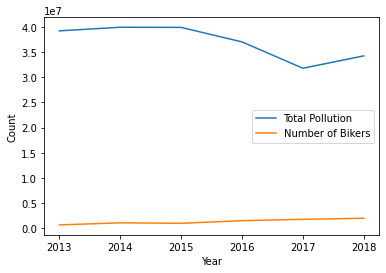

In [39]:
plt.plot(total_sums['Year'], total_sums["total_pollution"], label="Total Pollution")
plt.plot(total_sums['Year'], total_sums["biker_counts"], label="Number of Bikers")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()

For pollution levels, we see a decrease from 2013 to 2017, but an increase from there into 2018. Overall though, there is a decrease in the pollution levels. The number of Citibike trips has steadily increased from 2013 to 2018. While this could be a predictor of increased environmentally sustainable behavior, this increase in the number of trips could be due to a variety of other factors such as the growth in the Citibike program as more people find out about it and an increased convenience in using Citibike as new stations were constructed in places such as Queens (as per previous plots). 

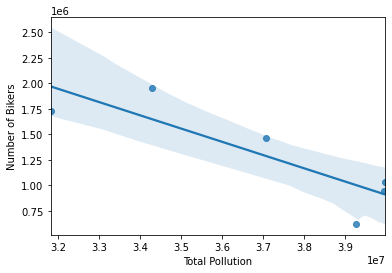

In [40]:
sns.regplot(x='total_pollution', y="biker_counts", data=total_sums)
plt.xlabel("Total Pollution")
plt.ylabel("Number of Bikers")
plt.show()

When we compare the total pollution levels to the number of bikers, we see a inversely proportional relationship. As the total pollution increase, we see a decrease in the number of bike trips (even though the overall trend is an increase as per the last plot). This seems contradictory to the previous plot at first, but can help explain how the levels of pollution in NYC, even though they are decreasing, are so high that increased sustainable behaviors like biking are unable to offset the differences. 

# Evaluation of Significance

### Recycling Capture Rate in 2010 vs. 2016
In this section, we used a t-test to see if the decrease in the capture rate from 2010 to 2016 was statistically significant. We did this by using the mean and standard deviation to contruct a normal distribution to approximate the sample from above and calculated the p value.

In [44]:
## Find the standard deviation for 2010 and 2016
std_2010 = recycling_2010[["Capture Rate"]].std()
std_2016 = recycling_2016[["Capture Rate"]].std()

In [45]:
##Create the distributions for 2010 and 2016 
x_2010 = pd.DataFrame(np.random.normal(mean_2010,std_2010, size=1000))
y_2016 = pd.DataFrame(np.random.normal(mean_2016,std_2016, size=1000))
recycling_model = LinearRegression().fit(x_2010,y_2016)
print("the slope is: ", round(float(recycling_model.coef_),4))

the slope is:  -0.0588


In [237]:
recycle_val = stats.ttest_ind(x_2010, y_2016)
print("The p-value is: ", round(float(recycle_val[1]),4))
print("The test statistic is:", round(float(recycle_val[0]),2))

The p-value is:  0.0237
The test statistic is: 2.26


In this case, our p-value was 0.02. Since the p-value is less than 0.05, this indicates that at a 95% confidence level, there is a statistically significant difference between the capture rates in 2010 and in 2016. This means that the decrease that we saw in capture rate from 2010 to 2016 likely occurred due to some other factor other than random chance. Based on our analysis from earlier, this decrease could have been due to decreased efficiency at the recycling plant or a decrease in sustainable recycling behaviors on the part of the general public. 

### Pollution Levels vs. Citibike Trips
In order to test whether the inversely proportional relationship was statistically significant, we created a Linear Regression model and fit the data with the total pollution sum and the counts of the number of bike rides. From this Linear Regression model, we were able to determine the slope, intercept, and r squared value.

In [47]:
pollution_bike_model = LinearRegression().fit(total_sums[['total_pollution']],total_sums[['biker_counts']])
pollution_bike_slope = pollution_bike_model.coef_[0][0]
pollution_bike_intercept = pollution_bike_model.intercept_[0]
pollution_bike_corr = pollution_bike_model.score(total_sums[['total_pollution']],total_sums[['biker_counts']])
print("The slope for total pollution levels in NYC vs. number of Citi bike trips is: {:.3f}".format(pollution_bike_slope))
print("The intercept for total pollution levels in NYC vs. number of Citi bike trips is: {:.3f}".format(pollution_bike_intercept))
print("The r squared value for total pollution levels in NYC vs. number of Citi bike trips is: {:.3f}".format(pollution_bike_corr))

The slope for total pollution levels in NYC vs. number of Citi bike trips is: -0.130
The intercept for total pollution levels in NYC vs. number of Citi bike trips is: 6096814.740
The r squared value for total pollution levels in NYC vs. number of Citi bike trips is: 0.737


The slope shows us that as the pollution levels increase by 1, the total number of bike trips decreases by 0.130. Since the r squared value, based on the linear regression model, was 0.737 we can see that the relationship between these two variables is quite strong and that the pollution levels is a good predictor of the number of bike trips. This shows us that the data is statistically significant.

### Pollution in 2011 vs. 2016
In this section, we test the statistical significance of the relationship between pollution levels in 2011 vs. the pollution levels in 2016. In order to do this, we split the dataset using train test split, train a linear regression model using the training set, and then test the accuracy of the linear regression model on the testing set. We then determine the accuracy of the training and testing set.

In [232]:
train_set, test_set = train_test_split(ghg_ny, test_size = 0.20, random_state = 15)
print ("This is the training set for the NY pollution data: ", train_set.head())
print ("This is the test set for the NY pollution data: ", test_set.head())

This is the training set for the NY pollution data:       Unnamed: 0  facility_id        frs_id                      facility_name  \
71           71      1002160  110004541434            GUARDIAN INDUSTRIES LLC   
31           31      1000771  110000582398                          Northport   
138         138      1006042  110007384106      TGP Station 245 West Winfield   
151         151      1006910  110019768526      OSWEGO CO ENERGY RECOVERY FAC   
120         120      1004894  110004513571  FULTON COUNTY DEPT OF SOLID WASTE   

              city state  zip_code               address           county  \
71          GENEVA    NY     14456          50 FORGE AVE   ONTARIO COUNTY   
31       NORTHPORT    NY     11768     EATON'S NECK ROAD          Suffolk   
138  WEST WINFIELD    NY     13491        457 BURROWS RD  HERKIMER COUNTY   
151         Fulton    NY     13069  2801 STATE ROUTE 481    OSWEGO COUNTY   
120      JOHNSTOWN    NY     12095            847 MUD RD    FULTON COUNTY  

In [217]:
pollution_model = LinearRegression().fit(train_set[["2011"]],train_set[["2016"]])
pollution_slope = pollution_model.coef_[0][0]
pollution_intercept = pollution_model.intercept_[0]
pollution_corr = pollution_model.score(train_set[["2011"]],train_set[["2016"]])
print("The slope for NY pollution levels in 2011 vs. the pollution levels in 2016: {:.3f}".format(pollution_slope))
print("The intercept for NY pollution levels in 2011 vs. the pollution levels in 2016: {:.3f}".format(pollution_intercept))
print("The r squared for NY pollution levels in 2011 vs. the pollution levels in 2016: {:.3f}".format(pollution_corr))

The slope for NY pollution levels in 2011 vs. the pollution levels in 2016: 0.659
The intercept for NY pollution levels in 2011 vs. the pollution levels in 2016: 46633.421
The r squared for NY pollution levels in 2011 vs. the pollution levels in 2016: 0.563


In [218]:
score_train = pollution_model.score(train_set[['2011']], train_set['2016'])
print("The percent accuracy of the training set is " + "{:.2%}".format(score_train))

The percent accuracy of the training set is 56.27%


In [219]:
score_test = pollution_model.score(test_set[['2011']], test_set['2016'])
print("The percent accuracy of the testing set is " + "{:.2%}".format(score_test))

The percent accuracy of the testing set is 80.29%


Through this test, we are able to find that the training set had an accuracy of 56% while the testing set had an accuracy of 80%. This shows that the data is somewhat predictive as we have a correlationof 0.563, but it does not have as strong a correlation as we saw before. This means that there is a correlation between pollution levels in 2011 and 2016, but it may not be as strong.

### Clustering Pollution Levels by Industry
In this section, we test the accuracy of the KMeans clustering by determining if the predicted industries (based on the KMeans clustering algorithm) correctly identifies the industry that the dataset originally indicated. 

In [220]:
industry_lookup = pd.DataFrame({"cluster_label": [0, 1, 2],
                                        "predicted_industry": ["Power Plants", "Waste", "Other"]})
industry_lookup.head()

,cluster_label,predicted_industry
0,0,Power Plants
1,1,Waste
2,2,Other


In [221]:
industry_predict = pd.merge(ghg_ny, industry_lookup, on="cluster_label")
industry_predict.head()

,Unnamed: 0,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,...,2018,2017,2016,2015,2014,2013,2012,2011,cluster_label,predicted_industry
0,0,1000077,110000774797,REPUBLIC STEEL LACKAWANNA,BLASDELL,NY,14219,S3049 LAKESHORE RD.,ERIE COUNTY,42.80,...,78801.40,76235.01,61447.47,73193.02,77355.81,71702.38,80619.20,72355.73,0,Power Plants
1,1,1000093,110000324435,Momentive Performance Materials,WATERFORD,NY,12188,260 HUDSON RIVER ROAD,Saratoga,42.82,...,134663.45,131363.56,125491.33,126818.78,127808.87,132095.46,120944.74,142529.89,0,Power Plants
2,3,1000108,110012158707,North 1st,BROOKLYN,NY,11211,NORTH 1ST & 47-79 RIVER ST,Kings,40.72,...,31069.94,22460.32,26369.45,18559.93,20816.32,26629.45,26775.50,45473.83,0,Power Plants
3,4,1000111,110012158734,Vernon Boulevard,LONG ISLAND CITY,NY,11427,42 30 VERNON BLVD,Queens,40.75,...,35221.82,28073.30,28262.00,27000.90,26232.55,43133.84,38257.51,44820.68,0,Power Plants
4,5,1000112,110019827286,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.66,...,70705.29,52698.66,66797.35,67399.25,40722.20,102599.22,68984.74,100591.83,0,Power Plants


In [223]:
num_correct = 0
for row in range(len(industry_predict)):
    if (industry_predict.iloc[row]['industry_sector'] == industry_predict.iloc[row]["predicted_industry"]):
        num_correct = num_correct + 1
accuracy = (num_correct/(len(industry_predict)-35))
print("The percent accuracy of predicting industry based on 2011 and 2016 pollution levels is: " + "{:.2%}".format(accuracy))

The percent accuracy of predicting industry based on 2011 and 2016 pollution levels is: 39.58%


After removing the industries that did not fall under Power Plants, Waste, and Other (the top three industries we clustered by), we got a prediction accuracy of 39%. As we saw with the pollution analysis for 2011 vs. 2016, this tells us that there is a relationship between the two variables but it may not be that strong. Including other variables might help lead to a stronger accuracy. 

# Interpretations and Conclusion

Overall, we see a few major trends in the datasets. From 2011 to 2018, we see an overall decrease in the pollution levels, but if we look at just NYC, which has been consistently in the top three polluters in New York state, the greenhouse gas emission levles have been relatively stable throughout the years and do not seem to increase nor decrease. By analyzing the recycling capture rate, we see a statistically significant decrease in the capture rate from 2010 to 2016, which shows a decrease in the efficiency of the recycling process which could either be due to lower engagement with sustainable practices in the general public or due to lower efficiency in the recycling plants themselves. However, this decrease can be attributed to changes in Manhattan as capture rates stay the same in Queens, Brooklyn, and Staten Island, and even increase in the Bronx. Lastly, from the Citibike dataset, we see that there is an increase in the number of bike trips from 2013 to 2018, which could be due to a number of factors including the construction of new drop-off and pick up stations in Queens, the growth of the Citibike program, or an increase in sustainable behavior. 

When we put all of these trends together, we see that there has been a mixed response to climate change from the general public. From the biking data, we see that the public and individuals are engaging more with sustainable behabiors by using transportation like bikes in place of fossil-fuel-dependent transportation options. However, from the recycling data, we see that perhaps on the government side (the government runs the recycling programs in NYC), that there is a decrease in engagement with sustainable behaviors as pollution decreases. This could be due to economic reasons or due to issues that NYC might be facing. In terms of the overall impact of these sustainable behaviors, in the graph where we compare pollution levels to number of bike trips, we see that even as the number of bike trips increases yearly, the pollution levels are so much greater, even though they are decreasing, that the benefits of sustainable transportation are almost negligible. The number of bikers are enough to offset pollution levels at the scales that we are seeing.

# Limitations

For our research question, we are interested in the relationship between climate change throughout the years and sentiment towards environmental activism and sustainable practices in the general public. This dataset, however, shows pollution levels by specific facilities and industries and not the general public. Because the dataset doesn’t reflect the entire population of who we’re trying to analyze, the trends we find might not be generalizable to the entire public and it might be difficult to bring the dataset of greenhouse gas emissions and recycling and bike usage together exactly. Since this data was collected by the EPA likely to regulate emissions, the emissions over time for each observation might be affected by certain EPA regulations. Another limitation includes the fact that the bike and recycling data is only for New York City and so we are not able to generalize our finding to all of New York State.

# Sources

 - https://www.epa.gov/mats/regulatory-actions-final-mercury-and-air-toxics-standards-mats-power-plants
 - https://www.citibikenyc.com/system-data/operating-reports
 - https://www.citibikenyc.com/system-data
 - https://python-graph-gallery.com/11-grouped-barplot/
 - https://data.world/city-of-ny/gaq9-z3hz
 - https://data.world/city-of-ny/7vsa-caz7
 - https://worldpopulationreview.com/boroughs/manhattan-population
 - https://portal.311.nyc.gov/article/?kanumber=KA-02013